# Coursework 1 Group (11)

Complete the following information

Group number: 11

Individual project student name and K number:

Shashwat Chandwadkar K2457766






# Load modules (code)

In [117]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_digits
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import label_binarize
from sklearn.metrics import balanced_accuracy_score, ConfusionMatrixDisplay, confusion_matrix, roc_auc_score, roc_curve
from scipy.stats import uniform, loguniform


# Load data (code)

In [118]:
# Load the digits dataset
digits = load_digits()
x, y = digits.data, digits.target

# Split the data into training and testing sets (80% training, 20% testing)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=7)

# Apply preprocessing (StandardScaler)
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
print("Training data shape:", x_train.shape)
print("Testing data shape:", x_test.shape)
print("Training labels shape:", y_train.shape)
print("Testing labels shape:", y_test.shape)




Training data shape: (1437, 64)
Testing data shape: (360, 64)
Training labels shape: (1437,)
Testing labels shape: (360,)


# Classification

In [119]:
#Intializing Classification techniques
svmD = SVC(random_state=7, probability=True)
lrD = LogisticRegression(random_state=7, max_iter=1000)


## Classification methods used (text)

classification methods used :


1.   Support Vector Machine (SVM)
2.   Logistic Regression



## Training (code)

In [120]:
# Initialize RandomSearchCV GridSearchCV for hyperparameter tuning
svm_dist = {
    'C': loguniform(1e-3, 1e3),
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto'] + list(np.logspace(-3, 3, 50)),
    'degree': [2, 3, 4],
}
svmH = RandomizedSearchCV(
    estimator=SVC(random_state=7, probability=True),
    param_distributions=svm_dist,
    n_iter=50,
    cv=5,
    scoring='balanced_accuracy',
    random_state=7,
    n_jobs=-1
)

lrGrid = {'C': [0.001, 0.01, 0.1], 'solver': ['liblinear', 'lbfgs']}
lrH = GridSearchCV(LogisticRegression(random_state=7, max_iter=1000), lrGrid, cv=3, scoring='balanced_accuracy')


# Training
# Train the default models
svmD.fit(x_train, y_train)
lrD.fit(x_train, y_train)

# Train the hyperparameter-tuned models
svmH.fit(x_train, y_train)
lrH.fit(x_train, y_train)

# Get the best estimators
svmBest = svmH.best_estimator_
lrBest = lrH.best_estimator_

# Train the best estimators
svmBest.fit(x_train, y_train)
lrBest.fit(x_train, y_train)



LogisticRegression(C=0.1, max_iter=1000, random_state=7)

## Evaluation (code)

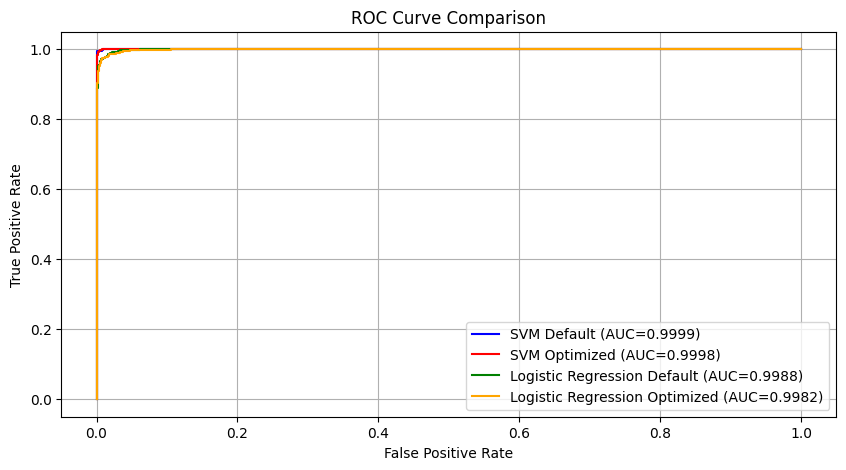

In [115]:
# Function to evaluate models
def comparison_evaluation(model, x_test, y_test, y_test_bin):
    y_pred = model.predict(x_test)
    y_score = model.predict_proba(x_test)
    bacc = balanced_accuracy_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test_bin, y_score, multi_class='ovr')
    return bacc, roc_auc, y_pred, y_score

# Evaluate the models
svmD_bacc, svmD_roc_auc, svmD_y_pred, svmD_y_score = comparison_evaluation(svmD, x_test, y_test, y_test_bin)
lrD_bacc, lrD_roc_auc, lrD_y_pred, lrD_y_score = comparison_evaluation(lrD, x_test, y_test, y_test_bin)

# Plotting ROC curves
plt.figure(figsize=(10, 5))

# ROC curves for Default models
fpr_svmD, tpr_svmD, _ = roc_curve(y_test_bin.ravel(), svmD_y_score.ravel())
fpr_lrD, tpr_lrD, _ = roc_curve(y_test_bin.ravel(), lrD_y_score.ravel())

# ROC curves for Hyperparameter-tuned models
fpr_svmH, tpr_svmH, _ = roc_curve(y_test_bin.ravel(), svmH_y_score.ravel())
fpr_lrH, tpr_lrH, _ = roc_curve(y_test_bin.ravel(), lrH_y_score.ravel())

# Plotting ROC curves with AUC valueas annotated
plt.plot(fpr_svmD, tpr_svmD, label=f"SVM Default (AUC={svmD_roc_auc:.4f})", color="blue")
plt.plot(fpr_svmH, tpr_svmH, label=f"SVM Optimized (AUC={svmH_roc_auc:.4f})", color="red")
plt.plot(fpr_lrD, tpr_lrD, label=f"Logistic Regression Default (AUC={lrD_roc_auc:.4f})", color="green")
plt.plot(fpr_lrH, tpr_lrH, label=f"Logistic Regression Optimized (AUC={lrH_roc_auc:.4f})", color="orange")

# Add labels, title, and legend
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend(loc="lower right")
plt.grid()
plt.show()

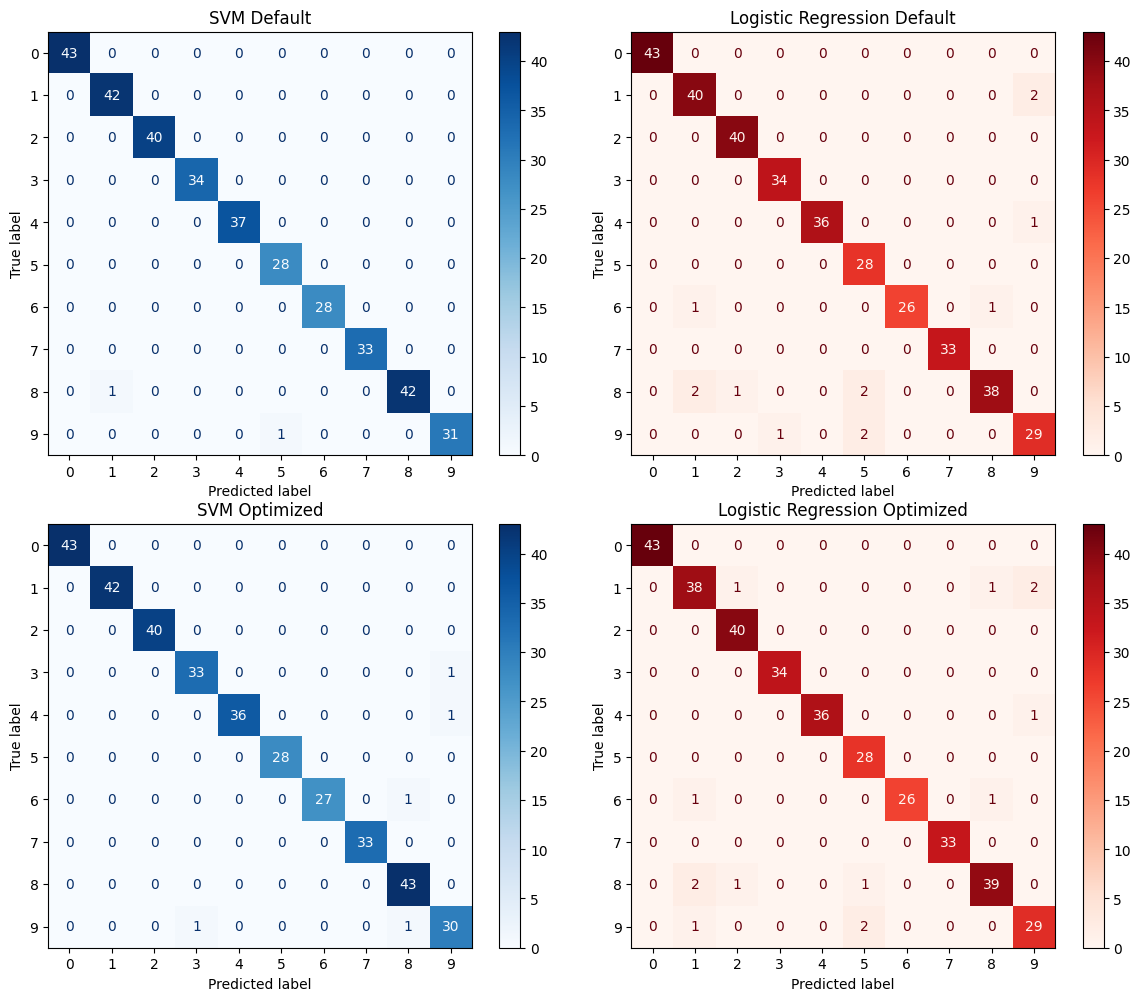

In [116]:
# Plotting confusion matrices
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

cm_svmD = confusion_matrix(y_test, svmD_y_pred)
cm_lrD = confusion_matrix(y_test, lrD_y_pred)
cm_svmH = confusion_matrix(y_test, svmH_y_pred)
cm_lrH = confusion_matrix(y_test, lrH_y_pred)

ConfusionMatrixDisplay(cm_svmD, display_labels=digits.target_names).plot(ax=axes[0, 0], cmap='Blues')
axes[0, 0].set_title("SVM Default")

ConfusionMatrixDisplay(cm_lrD, display_labels=digits.target_names).plot(ax=axes[0, 1], cmap='Reds')
axes[0, 1].set_title("Logistic Regression Default")

ConfusionMatrixDisplay(cm_svmH, display_labels=digits.target_names).plot(ax=axes[1, 0], cmap='Blues')
axes[1, 0].set_title("SVM Optimized")

ConfusionMatrixDisplay(cm_lrH, display_labels=digits.target_names).plot(ax=axes[1, 1], cmap='Reds')
axes[1, 1].set_title("Logistic Regression Optimized")

plt.tight_layout()
plt.show()

# References (text)

https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.balanced_accuracy_score.html

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.ConfusionMatrixDisplay.html

https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html

https://matplotlib.org/stable/gallery/text_labels_and_annotations/titles_demo.html#sphx-glr-gallery-text-labels-and-annotations-titles-demo-py

https://matplotlib.org/stable/tutorials/pyplot.html#sphx-glr-tutorials-pyplot-py

https://matplotlib.org/stable/gallery/subplots_axes_and_figures/subplots_demo.html

https://stackoverflow.com/questions/35572000/how-can-i-plot-a-confusion-matrix

https://medium.com/@dtuk81/confusion-matrix-visualization-fc31e3f30fea

https://sklearn-evaluation.ploomber.io/en/latest/classification/compare.html

https://sklearn-evaluation.ploomber.io/en/latest/classification/optimization.html

https://sklearn-evaluation.ploomber.io/en/latest/classification/basic.html

used Deepseek AI for fixing errors in syntax.